In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

STOCK = 'GOOGL'

# General Graphs
## All market timeserie

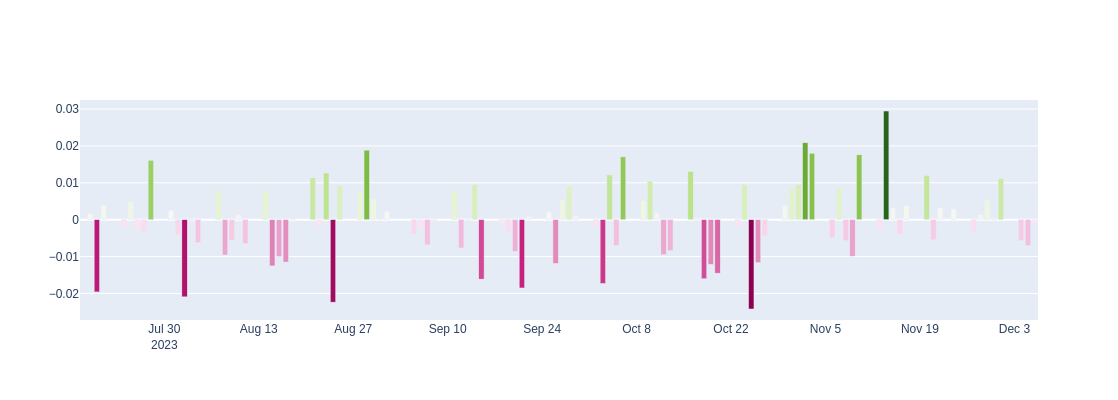

In [9]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2022-06-01"
symbol = "SPY"
#data = yf.download(symbol, start=start_date, end=end_date)
df= pd.read_csv("Dataset/data_historic_stock.csv") #TODO add ../

df['Date'] = pd.to_datetime(df['Date'])

# Sort values by 'Ticker' and 'Date' in case it's not sorted already
df = df.sort_values(by=['Ticker', 'Date'])

df['Date'] = pd.to_datetime(df['Date'])
df['Close_Pct_Change'] = df.groupby('Ticker')['Close'].pct_change()

# Calculate the mean percentage change for each day
mean_pct_change = df.groupby('Date')['Close_Pct_Change'].mean().reset_index()

# Create a new DataFrame with only 'Date' and 'mean of % difference'
result_df = mean_pct_change[['Date', 'Close_Pct_Change']].rename(columns={'Close_Pct_Change': 'Mean_%_Difference'})

result_df['Date'] = pd.to_datetime(result_df['Date'])

result_df["Color"] = np.where(result_df["Mean_%_Difference"]<0, 'red', 'green')

# Plot
fig = go.Figure()
fig.add_trace(
    go.Bar(name='Mean Percentual Difference',
           x=result_df['Date'],
           y=result_df['Mean_%_Difference'],
           marker_color=result_df['Mean_%_Difference']))
fig.update_layout(barmode='stack',width=800, height=400)
fig.show()


## Treemap

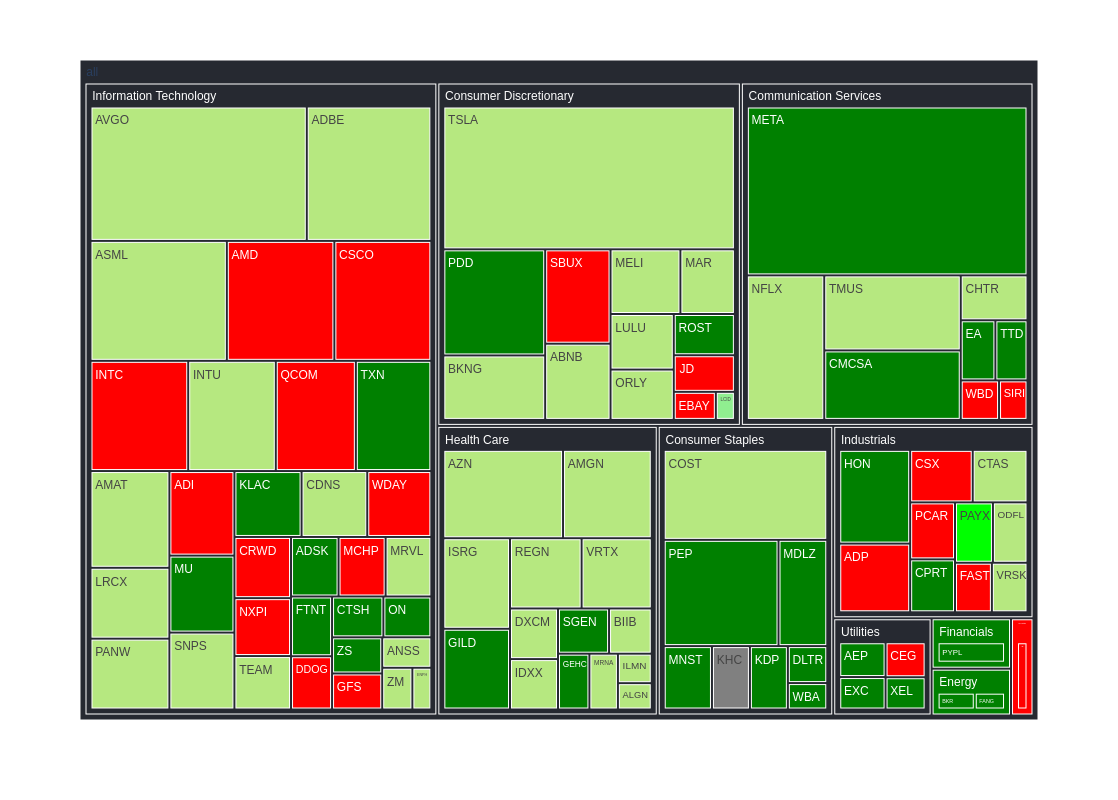

In [8]:
df = pd.read_csv('../Dataset/data_historic_tmp.csv')
df['Date'] = pd.to_datetime(df['Date'])
most_recent_date = df['Date'].max()
subset = df[df['Date'] == most_recent_date][['Ticker', 'Close']]
df2 = pd.read_csv("../Dataset/data_tmp.csv")
subset2 = df2[['Ticker','Sector', 'Stock_Price', 'Market_Cap']]

for index, row in subset.iterrows():
    # Find the value in 'Ticker' column of subset
    ticker_value = row['Ticker']
    
    # Find matching rows in subset2 based on 'Ticker' column
    matching_rows = subset2[subset2['Ticker'] == ticker_value]
    
    # If there is a match, update 'Close' column in subset2
    if not matching_rows.empty:
        # Assuming there's only one matching row, you can take the first one
        close_value = row['Close']
        
        # Update 'Close' column in subset2 with the found 'Close' value from subset
        subset2.loc[matching_rows.index, 'Close'] = close_value

# Create 'delta' column
subset2['Delta'] = subset2['Stock_Price'] - subset2['Close']

# Create 'Change' column as percentage change
subset2['Change'] = (subset2['Delta'] / subset2['Close']) * 100

df = subset2
df['Market_Cap']=df['Market_Cap'].astype('float')
color_group = [-1,-0.02,-0.01,0, 0.01, 0.02,1]
df['colors'] = pd.cut(df['Delta'], bins=color_group, labels=['red','indianred','gray','lightgreen','lime','green'])
fig = px.treemap(df, path=[px.Constant('all'), 'Sector', 'Ticker'], values='Market_Cap',
                  color='colors', hover_data=['Delta'],
                  color_discrete_map={'(?)':'#262931', 'red':'red', 'indianred':'indianred','gray':'gray', 'lightgreen':'lightgreen','lime':'lime','green':'green'},
                 
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                )
fig.update_layout( width=600, height=800)
fig.show()

## PieChart of the categorization of the expected dividend

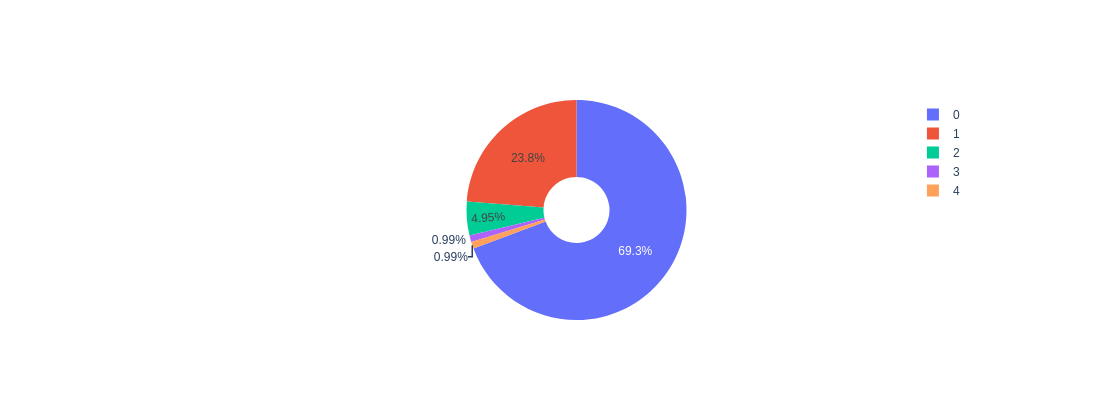

In [64]:
df = pd.read_csv('../Dataset/scaledData.csv')
fig = go.Figure(data=[go.Pie( values=df.value_counts('discretized FADY'), hole=.3)])
fig.update_layout( width=400, height=400)
fig.show()

## Expected dividend yield

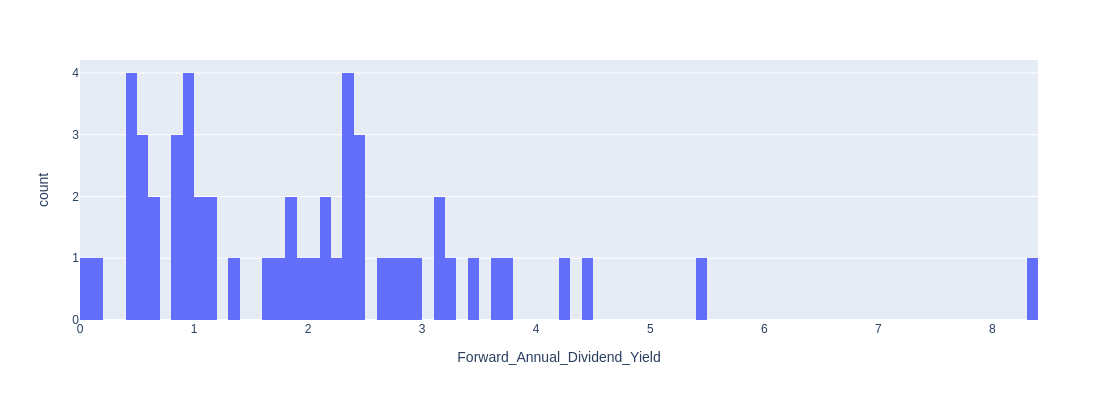

In [68]:
df = pd.read_csv("../Dataset/data.csv")
#df = df.sort_values(by='Forward_Annual_Dividend_Yield')

fig = px.histogram(df, x="Forward_Annual_Dividend_Yield", nbins=100)
fig.update_layout( width=800, height=400)
fig.show()

# Individual stock graphs
## Stock price timeserie

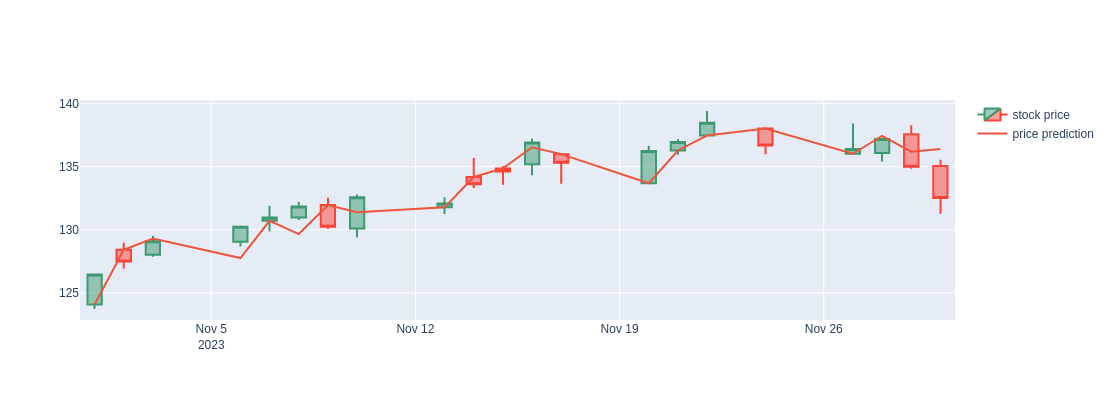

In [42]:
df = pd.read_csv('../Dataset/pred.csv')
df = df[df['Ticker'] == STOCK]
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df_p = df[df['Type'] == 'prediction']
df_r = df[df['Type'] == 'real']

fig = go.Figure()
trace_1 = go.Candlestick(x=df_r['Date'],
                open=df_r['Open'],
                high=df_r['High'],
                low=df_r['Low'],
                close=df_r['Close'],
                name = 'stock price')

trace_2 = go.Scatter(x=df_p['Date'], y=df_p['Close'], name='price prediction')

fig = go.Figure(data=[trace_1,trace_2])
fig.update_layout(xaxis_rangeslider_visible=False, width=800, height=400)
fig.show()